# Task1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

##  

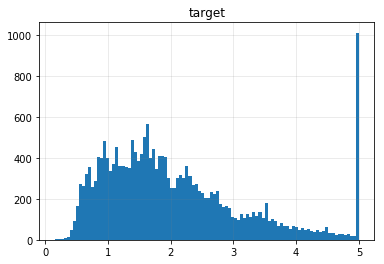

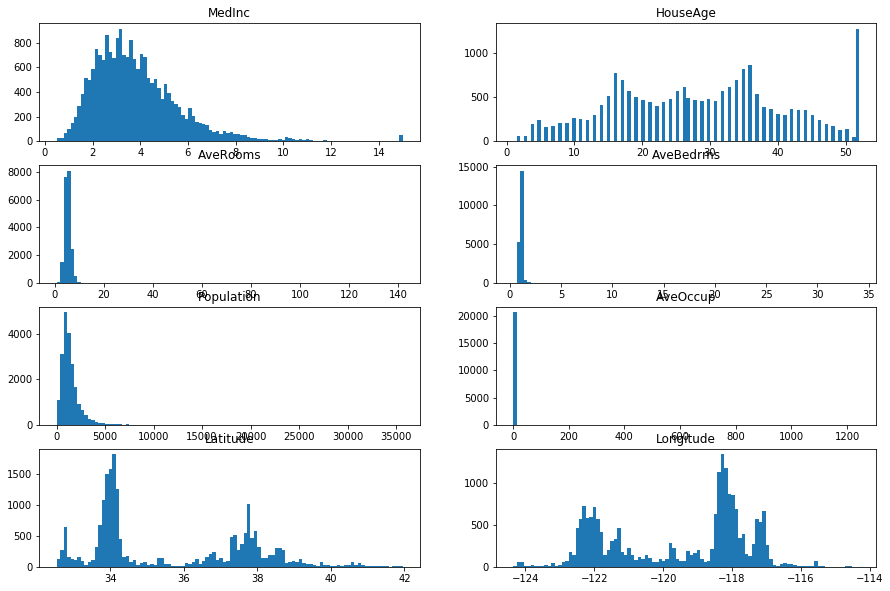

In [18]:
california_dataset = sklearn.datasets.fetch_california_housing()

plt.hist(california_dataset['target'],bins=100)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
plt.title('target')
plt.show()

fig, axes = plt.subplots(4,2,figsize=(15,10))
for i in range(0,4):
    for j in range(0,2):
        axes[i,j].hist(california_dataset['data'][:,i*2+j],bins=100)
        axes[i,j].set_title(california_dataset['feature_names'][i*2+j])
plt.show()

#### From the above eight feature plots, 'AveRooms', 'AveBedrms','Population' and 'AveOccup' have inappropriate x scale, which means there are some outliers on these four features. We may need to remove these outliers, than re-scale the x axis.

##  

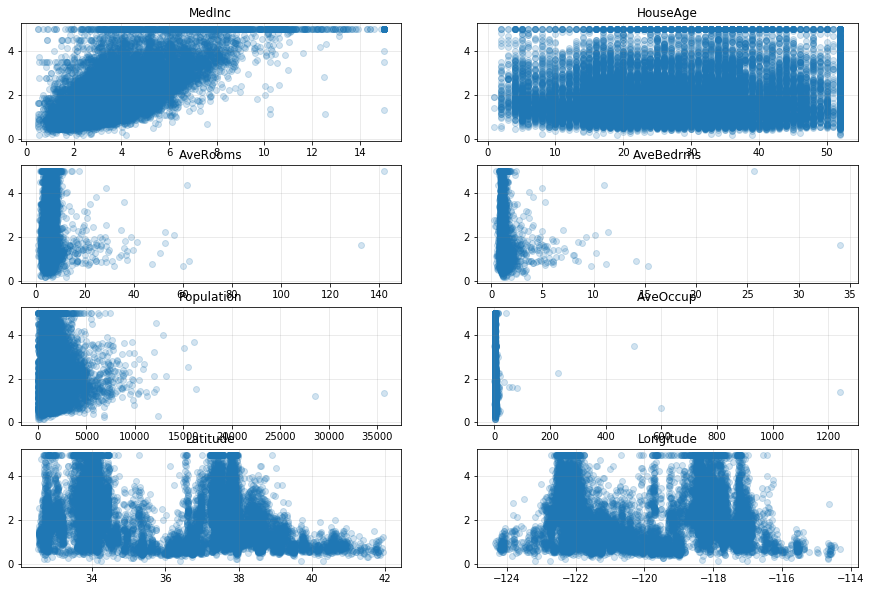

In [4]:
fig, axes = plt.subplots(4,2,figsize=(15,10))
for i in range(0,4):
    for j in range(0,2):
        axes[i,j].scatter(california_dataset['data'][:,i*2+j],california_dataset['target'],alpha=0.2)
        axes[i,j].set_title(california_dataset['feature_names'][i*2+j])
plt.show()

##  

In [12]:
X_train, X_test, y_train, y_test = train_test_split(california_dataset['data'],california_dataset['target'])
LRScore=np.mean(cross_val_score(LinearRegression(), X_train, y_train))
RidgeScore=np.mean(cross_val_score(Ridge(), X_train, y_train))
LassoScore=np.mean(cross_val_score(Lasso(), X_train, y_train))
ElasticNetScore=np.mean(cross_val_score(ElasticNet(), X_train, y_train))
print('LRScore:{}\nRidgeScore:{}\nLassoScore:{}\nElasticNetScore:{}'.format(LRScore,RidgeScore,LassoScore,ElasticNetScore))

LRScore:0.6102422922538064
RidgeScore:0.6102437749800811
LassoScore:0.2819718569982819
ElasticNetScore:0.4229514321435757


Scaling the features

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
LRScore_S=np.mean(cross_val_score(LinearRegression(), X_train_scaled, y_train))
RidgeScore_S=np.mean(cross_val_score(Ridge(), X_train_scaled, y_train))
LassoScore_S=np.mean(cross_val_score(Lasso(), X_train_scaled, y_train))
ElasticNetScore_S=np.mean(cross_val_score(ElasticNet(), X_train_scaled, y_train))
print('LRScore:{}\nRidgeScore:{}\nLassoScore:{}\nElasticNetScore:{}'.format(LRScore_S,RidgeScore_S,LassoScore_S,ElasticNetScore_S))

LRScore:0.6102422922538069
RidgeScore:0.6102441875598729
LassoScore:-0.00015307833209199373
ElasticNetScore:0.20448945641200397


#### According to the results, Scaling doesn't help the OLR and Ridge. Besides, it even has a negative influence on the Lasso and ElasticNet.

##   

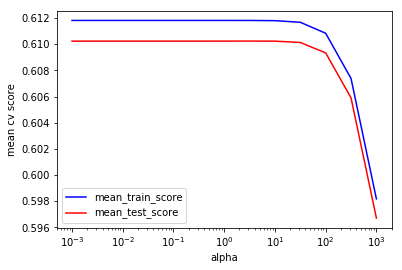

best score:0.6102457318944084
best parameters:{'alpha': 3.1622776601683795}


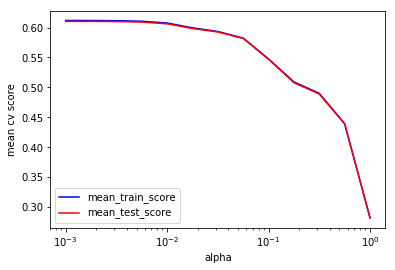

best score:0.6102299335181556
best parameters:{'alpha': 0.001}


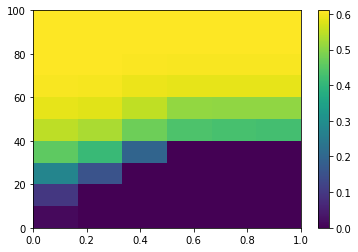

best score:0.6102407928395485
best parameters:{'alpha': 0.001, 'l1_ratio': 0.01}


In [20]:
# Ridge
param_grid = {'alpha': np.logspace(-3, 3, 13)}
grid = GridSearchCV(Ridge(), param_grid,return_train_score=True)
grid.fit(X_train, y_train)
plt.plot(param_grid['alpha'], grid.cv_results_['mean_train_score'],c='blue',label='mean_train_score')
plt.plot(param_grid['alpha'], grid.cv_results_['mean_test_score'],c='red',label='mean_test_score')
plt.xlabel('alpha')
plt.ylabel('mean cv score')
plt.xscale('log')
plt.legend()
plt.show()
ridge = grid.best_estimator_
print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))

#Lasso
param_grid = {'alpha': np.logspace(-3, 0, 13)}
grid = GridSearchCV(Lasso(), param_grid,return_train_score=True)
grid.fit(X_train, y_train)
plt.plot(param_grid['alpha'], grid.cv_results_['mean_train_score'],c='blue',label='mean_train_score')
plt.plot(param_grid['alpha'], grid.cv_results_['mean_test_score'],c='red',label='mean_test_score')
plt.xlabel('alpha')
plt.ylabel('mean cv score')
plt.xscale('log')
plt.legend()
plt.show()
lasso = grid.best_estimator_
print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))

# ElasticNet
param_grid = {'alpha': np.logspace(-3, 2, 10),'l1_ratio': [0.01, .1, .5, .9, .98, 1]}
grid = GridSearchCV(ElasticNet(), param_grid,return_train_score=True)
grid.fit(X_train, y_train)
res = pd.pivot_table(pd.DataFrame(grid.cv_results_),values='mean_test_score', index='param_alpha', columns='param_l1_ratio')
plt.imshow(res,extent=[0,1,0,100], aspect="auto")
plt.colorbar()
plt.show()
en = grid.best_estimator_
print('best score:{}\nbest parameters:{}'.format(grid.best_score_,grid.best_params_))

#### According to the results, GridSearch only can improve Lasso and ElasticNet.

##   

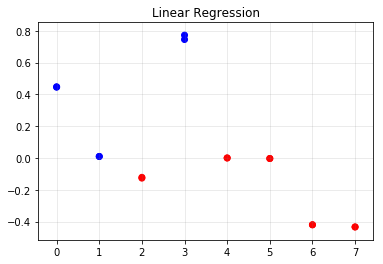

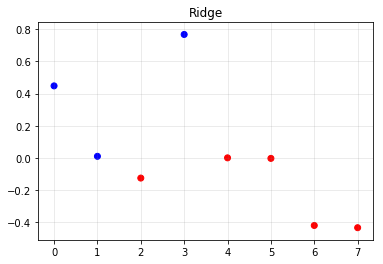

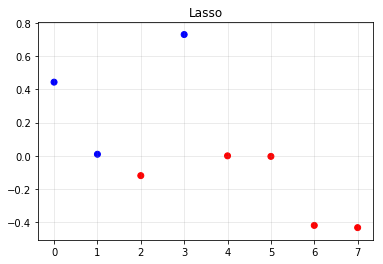

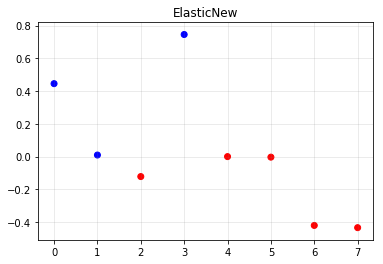

In [17]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_train.shape[1]), lr.coef_,c=np.sign(lr.coef_), cmap="bwr_r")
plt.title('Linear Regression')
plt.show()

plt.scatter(range(X_train.shape[1]), ridge.coef_,c=np.sign(ridge.coef_), cmap="bwr_r")
plt.title('Ridge')
plt.show()

plt.scatter(range(X_train.shape[1]),lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r")
plt.title('Lasso')
plt.show()

plt.scatter(range(X_train.shape[1]),en.coef_, c=np.sign(en.coef_), cmap="bwr_r")
plt.title('ElasticNew')
plt.show()

#### Yes, it agrees on the features which are important.